# Um estudo sobre acidentes aéreos

Por anos os aviões são considerados o segundo meio de transporte mais seguro do mundo, perdendo apenas para elevadores. Cobrindo longas viagens em um curto espaço de tempo, tais aeronaves proveram diversas vantagens para o mundo, tanto comercial quanto a lazer. Infelizmente, como todo meio de transporte, as aeronaves possuem sua conta de tragédias. O último caso com grande repercusão, até a data de publicação deste estudo <a href='https://www.cnnbrasil.com.br/nacional/veja-as-fotos-da-queda-do-aviao-com-a-cantora-marilia-mendonca/'>foi o acidente do avião que transportava entre outros, a cantora Marília Mendonça para um show da cidade mineira Piedade de Caratinga e que infelizmente não resistiu aos ferimentos</a>.

# Sobre este estudo

Estamos utilizando dados abertos disponibilizados pela CENIPA - Centro de Investigação e Prevenção de Acidentes aeronáuticos. O arquivo contem informações sobre ocorrências envolvendo aeronaves no período de 2010 a 2019. Você pode acessar dados mais atualizados visitando <a href='http://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira'>a página oficial de Dados Abertos Brasileiros</a>, mas, caso deseje, poderá estar realizando o download dos datasets utilizados aqui através dos links de download abaixo.


Para este estudo, utilizamos um datasets da CENIPA:


<a href='dataset\ocorrencias_cenipa.csv'>ocorrencias_cenipa.csv</a>: possui os dados sobre cada ocorrência registrada entre 2010 a 2019.

Podemos localizar no dataset as seguintes variáveis:

* codigo
* tipo
* descricao
* cidade
* estadot
* datat
* ano
* horat
* aeronave_liberada
* status_investigacao
* aeronaves_envolvidas
* ocorrencia_saida_pista
* aeronave_tipo
* aeronave_fabricante
* motor_tipo
* aeronave_motor_quantidade
* aeronave_assentos
* aeronave_ano_fabricacao
* aeronave_pais_fabricante
* aeronave_fase_operacao
* aeronave_nivel_dano

# Perguntas a serem respondidas

Dentre outros _insights_ gerados através deste estudo, quero responder as seguintes perguntas:


* Quais são as maiores causas de ocorrências e, eventualmente, queda de aviões?
* Como tem sido a progressão desses casos nos últimos anos? Tiveram menos ocorrências ou mais?
* Quais os estados que mais possuem ocorrências registradas?
* Qual tipo de aeronave possui mais problemas? Aviões, jatos, helicópteros...? 
* Quais as fabricantes com maior número de defeitos registrados?
* Será que durante o pouso é mais comum ter problemas do que durante a decolagem? Ou durante a viagem em si é mais frequente surgir defeitos?
* Viagens comerciais regulares tendem a ter mais problemas do que voos fretados?
* Quantos incidentes com fatalidades (morte de passageiros e tripulação) temos registro no período de 2010 a 2019?

# Importando bibliotecas

In [109]:
import pandas as pd #Para criação de DataFrames
import matplotlib.pyplot as plt #Para plotagem
import random 

# Leitura do dataset

In [110]:
ocorrencias = pd.read_csv('dataset\ocorrencias_cenipa.csv')

In [111]:
# Verificando a estrutura da tabela
ocorrencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo                     5242 non-null   int64 
 1   tipo                       5242 non-null   object
 2   descricao                  5242 non-null   object
 3   cidade                     5242 non-null   object
 4   estado                     5242 non-null   object
 5   data                       5242 non-null   object
 6   ano                        5242 non-null   int64 
 7   hora                       5242 non-null   object
 8   aeronave_liberada          5242 non-null   object
 9   status_investigacao        5242 non-null   object
 10  aeronaves_envolvidas       5242 non-null   int64 
 11  ocorrencia_saida_pista     5242 non-null   object
 12  aeronave_tipo              5242 non-null   object
 13  aeronave_fabricante        5242 non-null   object
 14  motor_ti

In [112]:
print('O arquivo \"ocorrencias_cenipa.csv\" ' + str(ocorrencias.shape[0]) + ' linhas e ' + str(ocorrencias.shape[1]) + ' colunas')

O arquivo "ocorrencias_cenipa.csv" 5242 linhas e 21 colunas


<h2>Limpeza de Dados (Data Cleaning)</h2>

O primeiro processo deste estudo será realizar a limpeza e tratativa dos dados. Vamos inicialmente verificar como a tabela do arquivo "ocorrencias_cenipa.csv" é apresentada.

In [113]:
# Verificando como o tabela está sendo apresentanda (apenas os cinco primeiros registros)
ocorrencias.head(5)

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,...,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,14:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,14:20:00,SIM,FINALIZADA,...,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,19:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,20:45:00,SIM,FINALIZADA,...,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,17:20:00,SIM,FINALIZADA,...,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


Acima você pode verificar como o arquivo está estruturado. Como disse no código anteriormente, o arquivo "ocorrencia_cenipa.csv" contém 5242 linhas e 21 colunas. Ou seja, há 5242 registros de ocorrências no período de 2010 a 2019.


Em seguida, quero descobrir como a linguagem Python está identificando cada coluna. Será que ele está tratando o código da ocorrência (_codigo_) como _número inteiro_ ou _string_? 

Para isso utilizamos o comando ```dtypes```, pois ele nos responderá.

In [114]:
# Mostrando o como o Python está interpretando cada coluna
ocorrencias.dtypes

codigo                        int64
tipo                         object
descricao                    object
cidade                       object
estado                       object
data                         object
ano                           int64
hora                         object
aeronave_liberada            object
status_investigacao          object
aeronaves_envolvidas          int64
ocorrencia_saida_pista       object
aeronave_tipo                object
aeronave_fabricante          object
motor_tipo                   object
aeronave_motor_quantidade    object
aeronave_assentos             int64
aeronave_ano_fabricacao       int64
aeronave_pais_fabricante     object
aeronave_fase_operacao       object
aeronave_nivel_dano          object
dtype: object

Cada linha abaixo do comando ```dtypes``` representa uma coluna do conjunto de dados "ocorrencias_cenipa.csv", totalizando 21 linhas. Do lado direito, está a forma como a linguagem interpreta ela. ```codigo``` está, realmente, sendo tratado como número inteiro (_int64_), enquanto campos como cidade, estado e descrição são interpretados como _string_, ou _object_, como visto acima.


Agora vamos tratar os nomes das colunas que iremos trabalhar. Antes de mais nada, vamos exibir cada uma delas, usando o comando ```columns``` da biblioteca pandas.

In [115]:
# Colunas do arquivo 'ocorrencias_cenipa.csv'
ocorrencias.columns

Index(['codigo', 'tipo', 'descricao', 'cidade', 'estado', 'data', 'ano',
       'hora', 'aeronave_liberada', 'status_investigacao',
       'aeronaves_envolvidas', 'ocorrencia_saida_pista', 'aeronave_tipo',
       'aeronave_fabricante', 'motor_tipo', 'aeronave_motor_quantidade',
       'aeronave_assentos', 'aeronave_ano_fabricacao',
       'aeronave_pais_fabricante', 'aeronave_fase_operacao',
       'aeronave_nivel_dano'],
      dtype='object')

__ocorrencias_cenipa.csv__ é um arquivo relativamente grande. Possui muitas linhas e colunas que concedem muitos detalhes a cerca da ocorrência registrada, contudo, não precisamos de todas essas colunas para esse estudo. A fim de deixar a exibição mais apresentável e limpa, vamos eliminar algumas colunas que não precisaremos, como _ocorrencia_saida_pista_, _status_investigacao_, _aeronave_liberada_, _aeronaves_envolvidas_ e _hora_.

In [116]:
# Retirando colunas que não serão usadas
ocorrencias.drop(['hora', 'ocorrencia_saida_pista', 'status_investigacao','aeronaves_envolvidas','aeronave_liberada'], axis = 1, inplace = True)

In [117]:
# Salvando Alteração realizda no dataset
ocorrencias.to_csv('dataset\ocorrencias_cenipa_v2.csv')

In [118]:
# Verificando como o tabela está sendo apresentanda após a retirada das colunas 
# (apenas os cinco primeiros registros)
ocorrencias.head(5)

,codigo,tipo,descricao,cidade,estado,data,ano,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


Deixei as colunas que acredito que precisaremos em nosso dataset e além disso renomeei as colunas de uma forma que facilitará o entedimento. No final, vou incluir uma nova coluna (__CONTAGEM__) que será usada para realizar cálculos.

In [119]:
#Renomeando colunas do dataset ocorrencia.csv
ocorrencias.columns = ['CÓDIGO DA OCORRÊNCIA','TIPO DE OCORRÊNCIA', 'DESCRIÇÃO DA OCORRÊNCIA', 'CIDADE',
                      'UF','DATA DA OCORRÊNCIA', 'ANO', 'TIPO AERONAVE', 'FABRICANTE AERONAVE', 'TIPO DE MOTOR', 'QUANTIDADE MOTOR',
                      'ASSENTOS', 'ANO FABRICAÇÃO', 'PAÍS FABRICAÇÃO', 'FASE DE OPERAÇÃO', 'NÍVEL DO DANO']

# Inserindo coluna para contagem
ocorrencias['CONTAGEM'] = 1

Vou executar um comando para remover as linhas em que o campo Código da Ocorrência está inválido.

Como vimos no comando _.info()_ no início, aparentemente não há linhas com código inválido, mas caso futuramente seja necessário inserir novos dados no dataset, já estou tratando esse problema.

In [120]:
#Derrubando colunas onde o código da ocorrência é inválido
ocorrencias['CÓDIGO DA OCORRÊNCIA'].dropna(axis = 0, inplace = True)

Vamos ver como ficou nosso novo DataFrame.

In [121]:
ocorrencias.head()

,CÓDIGO DA OCORRÊNCIA,TIPO DE OCORRÊNCIA,DESCRIÇÃO DA OCORRÊNCIA,CIDADE,UF,DATA DA OCORRÊNCIA,ANO,TIPO AERONAVE,FABRICANTE AERONAVE,TIPO DE MOTOR,QUANTIDADE MOTOR,ASSENTOS,ANO FABRICAÇÃO,PAÍS FABRICAÇÃO,FASE DE OPERAÇÃO,NÍVEL DO DANO,CONTAGEM
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE,1
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL,1
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL,1
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA,1
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE,1


# Visualização dos Dados (Data Visualization)

Certo, nosso DataFrame está mais limpo e apresentável. Agora, vamos realizar alguns <i>Insights</i> em torno dos dados contidos aqui.

As primeiras perguntas que eu gostaria de responder são:

__Como é classificada uma ocorrência? Como se divide o total geral nestas categorias?__


Para responder a isso, criei a variável ```tipo_ocorrencia```, que armazenará as informações deste dataset agrupadas por classificação. A coluna ```CONTAGEM``` será somada, retornando um gráfico com o total de ocorrências para cada classificação.

Ficou confuso? Vamos ver como funciona na prática!

In [122]:
#Cores para serem usadas nos gráficos
colors = [['#0D47A1','#1565C0','#1976D2','#1E88E5','#2196F3'],
          ['#311B92','#512DA8','#673AB7','#9575CD','#B39DDB'],
          ['#1B5E20','#388E3C','#4CAF50','#81C784','#66BB6A'],
          ['#E65100','#EF6C00','#F57C00','#FB8C00','#FF9800'],
          ['#3E2723','#4E342E','#5D4037','#6D4C41','#795548'],
          ['#BF360C','#D84315','#E64A19','#F4511E','#FF5722'],
          ['#880E4F','#AD1457','#C2185B','#D81B60','#E91E63']
         ]

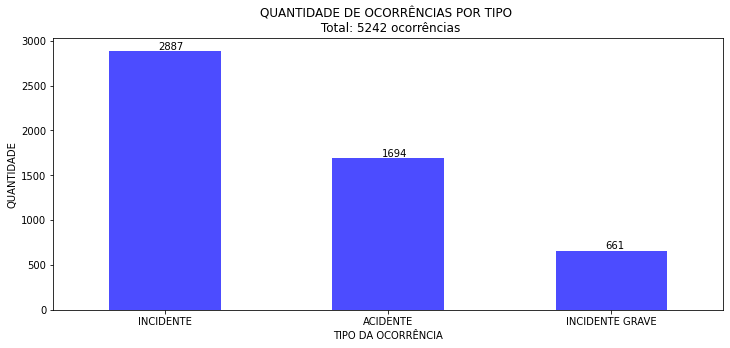

In [123]:
tipo = ocorrencias.groupby('TIPO DE OCORRÊNCIA')['CONTAGEM'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,5), color='blue', alpha=.7)

for p in tipo.patches:
    b=p.get_bbox()
    tipo.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.xticks(rotation=0)
plt.xlabel('TIPO DA OCORRÊNCIA')
plt.ylabel('QUANTIDADE')
plt.title('QUANTIDADE DE OCORRÊNCIAS POR TIPO \n Total: ' + str(ocorrencias['CONTAGEM'].sum()) + ' ocorrências')
plt.show()

Como podemos ver no gráfico, as ocorrências são divididas em três tipo: Acidente, Incidente e Incidente Grave. Lembrando que, embora este dataset trate de ocorrências envolvendo aeronaves entre 2010 e 2019, não significa que todas as ocorrências neste período foram graves ou que houveram fatalidades. Alguns casos são sim, de quedas de avião decorrente de alguma falha humana ou mecânica, mas você verá mais a frente que nem todos são assim.

Após classificarmos nossas ocorrências, quero responder a mais uma pergunta: 

__Quais ocorrências que existem e qual foi sua frequência no período de 2010 a 2019?__

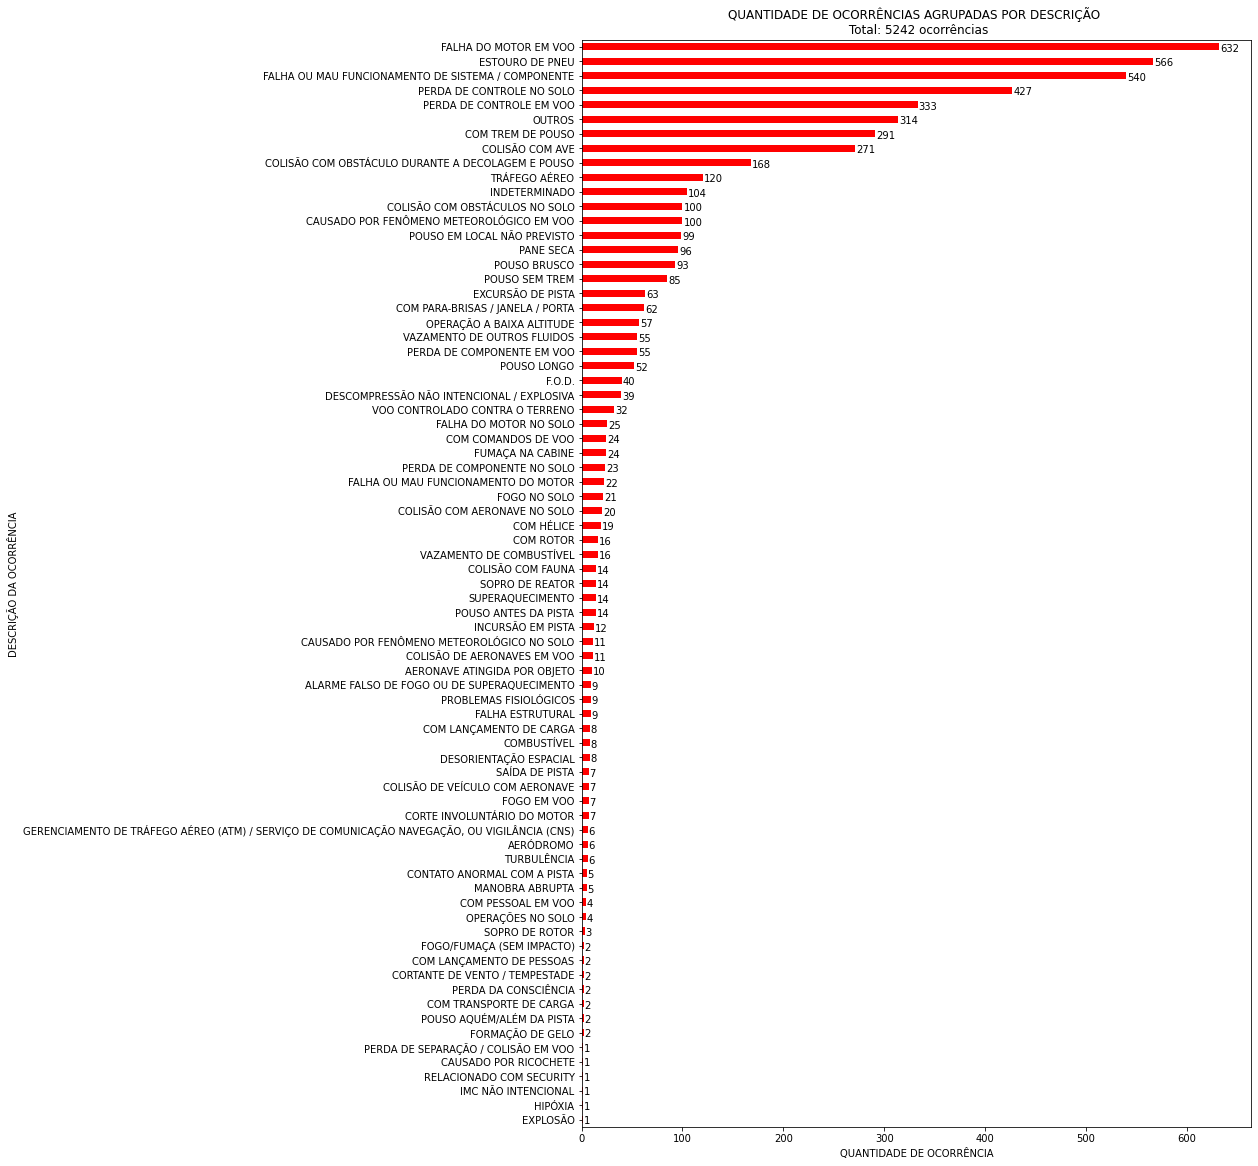

In [124]:
ax = ocorrencias.groupby('DESCRIÇÃO DA OCORRÊNCIA')['CONTAGEM'].sum().sort_values(ascending=True).plot(kind='barh', color='red', figsize=(12,20))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('QUANTIDADE DE OCORRÊNCIAS AGRUPADAS POR DESCRIÇÃO \n Total: ' + str(ocorrencias['CONTAGEM'].sum()) + ' ocorrências')
plt.ylabel('DESCRIÇÃO DA OCORRÊNCIA')
plt.xlabel('QUANTIDADE DE OCORRÊNCIA')
plt.show()

A forma como este gráfico foi gerado é semelhante ao gráfico anterior: agrupei todos os dados da coluna 'DESCRIÇÃO DA OCORRÊNCIA', fiz a soma dos valores da coluna 'CONTAGEM' e então realizei a plotagem desses dados para melhor visualização.

De acordo com os dados desse _plot_, as maiores causas de ocorrências são devidas a falhas de motor durante o vôo, seguida por estouro de pneu, falha ou mal funcionamento de sistema/componente, perda de controle em solo e perda de controle em vôo. Embora algumas causas nos remetam a falha humana na operação, não podemos levar isto como uma regra. Uma perda de controle em vôo por exemplo pode dever-se desde incompetência técnica até falha em dispositivos como o radar.

Seguindo nosso estudo, vamos responder a próxima pergunta:

__Como tem sido a progressão desses últimos anos? Tiveram menos ocorrências ou mais?__

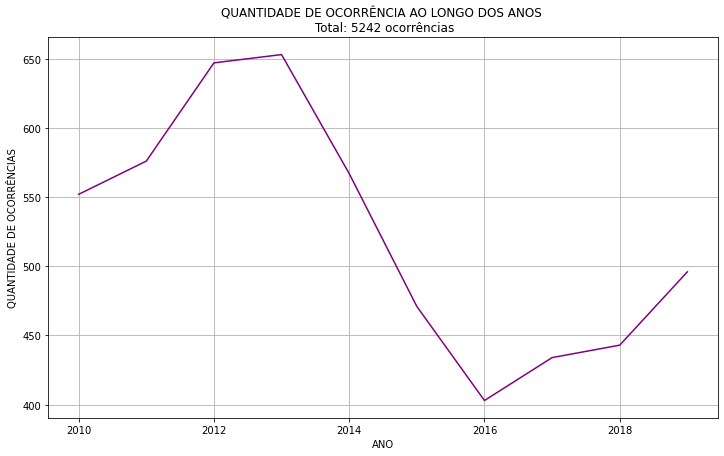

In [125]:
plotagem_data = ocorrencias.copy()
plotagem_data['DATA DA OCORRÊNCIA'] = plotagem_data['DATA DA OCORRÊNCIA'].apply(lambda x: x.replace(x,x[0:4]))
plotagem_data.groupby('DATA DA OCORRÊNCIA')['CONTAGEM'].sum().plot(color='purple', figsize=(12,7), grid=True)

plt.title('QUANTIDADE DE OCORRÊNCIA AO LONGO DOS ANOS \n Total: ' + str(ocorrencias['CONTAGEM'].sum()) + ' ocorrências')
plt.xlabel('ANO')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.show()

A progressão de ocorrências aéres nos últimos entre 2010 e 2019 tem crescido tido oscilações. No período inicial dos dados contidos no dataset em 2010 tivemos cerca que 550 ocorrências, em 2012 esse número subiu para quase 650! De 2013 a 2016 tívemos um ponto positivo, pois houve uma grande queda de aproximademente 37% nas ocorrrência, onde passamos de cetrca de 650 ocorrência para aproximadamente 400 ocorrência, porém após 2016, voltamos a ter uma alta de cerca de 22%, passando de aproximadamente 400 ocorrências para 500!

E quanto aos estados? <b>Quais foram os que mais registraram ocorrências?</b>

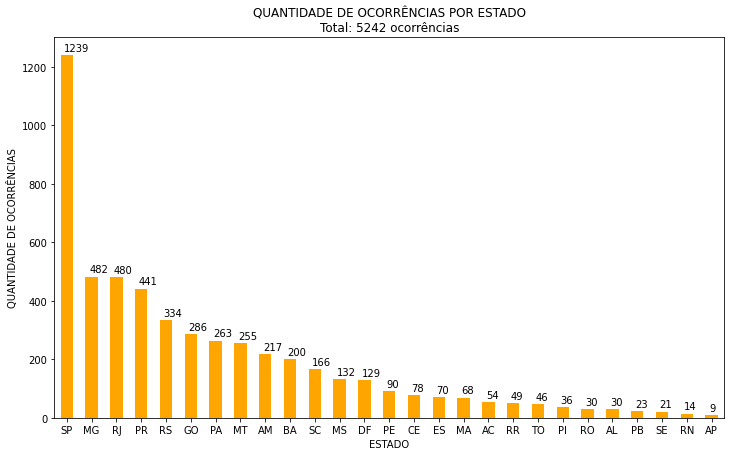

In [126]:
ax_estado = ocorrencias.groupby('UF')['CONTAGEM'].sum().sort_values(ascending=False).plot(kind='bar', color='orange', figsize=(12,7))

for p in ax_estado.patches:
    b=p.get_bbox()
    ax_estado.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))

plt.xlabel('ESTADO')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.title('QUANTIDADE DE OCORRÊNCIAS POR ESTADO\nTotal: ' + str(ocorrencias['CONTAGEM'].sum()) + ' ocorrências')
plt.xticks(rotation=0)
plt.show()

O Estado de São Paulo foi o que mais teve ocorrências de 2010 a 2019, seguido por Minas Gerais, Rio de Janeiro e Paraná. É de conhecimento que São Paulo é o estado com mais aeroportos do Brasil o que nos permitiria cogitar que este é o motivo de tantas ocorrências, porém, outros estados com muitos aeroportos como: Goiás, Maranhão, Mato Grosso e Minas Gerais obtiveram um _número_ consideravelmente menor que o estado de São Paulo, sendo assim o número de aeroportos aparentemente não está relacionado a quantidade de ocorrências.

# Fazendo uma análise sobre as aeronaves

Agora vamos fazer uma análise acerca das aeronaves que estavam envolvidas nas ocorrências registradas do período de 2010 a 2019. Vamos trazer a seguir alguns _Insights_ a partir da visualização dos dados.

Vamos visualizar algumas das ocorrências de mesmo número

# Visualização dos Dados (Data Visualization)

Referente as aeronaves, dentro do dataset temos a informação sobre o tipo de motor que a aeronave utiliza, sendo assim, podemos nos perguntar:

__Qual tipo de motor mais gerou ocorrências entre 2010 e 2019?__

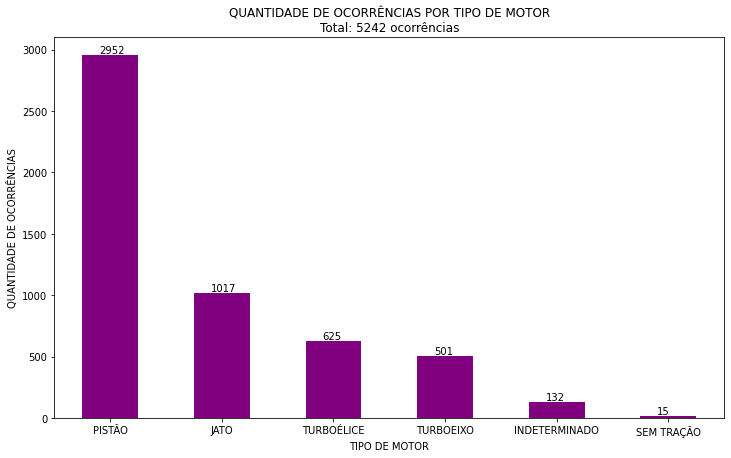

In [127]:
ax_motor = ocorrencias.groupby('TIPO DE MOTOR')['CONTAGEM'].sum().sort_values(ascending=False).plot(kind='bar', color='purple', figsize=(12,7))

for p in ax_motor.patches:
    b=p.get_bbox()
    ax_motor.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))

plt.title('QUANTIDADE DE OCORRÊNCIAS POR TIPO DE MOTOR\nTotal: '+str(ocorrencias['CONTAGEM'].sum())+' ocorrências')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xticks(rotation=0)
plt.show()

O maior número de ocorrências ocorrem nas aeronaves com motores a pistão. Esse motor é um dos mais antigos (e até usados) motores de aeronave no mundo, muito comum em aviões monomotores. Esses motores, além do baixo custo, eles são semelhantes aos motores de carro, mas tratados com os padrões de qualidade e confiança da aeronáutica, funcionando muito bem em baixar altitudes.

O segundo e terceiro lugar ficaram para os motores a Jato e Turboélice. Assim como o motor de pistão, o Turboélice é caracterizado pela hélice que fica a frente do avião, utilizando a famosa Lei da Ação e Reação para movimentar a aeronave, contudo, sua diferença está em utilizar pequenos jatos para realizar tal funcionamento.

Após verificarmos que as maiores ocorrências ocorrem em aeronaves com motores a pistão, gostaria agora de saber dentre os tipos de aeronaves presentres no dataset, quais aparecem com maior frequência, se são os _aviões_, _helicópteros_ ou outro tipo de aeronave.

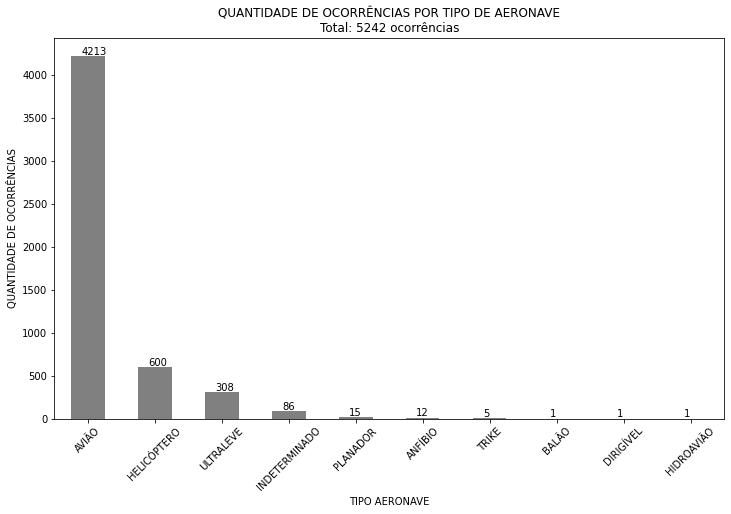

In [128]:
ax_tipo = ocorrencias.groupby('TIPO AERONAVE')['CONTAGEM'].sum().sort_values(ascending = False).plot(kind='bar', figsize=(12,7), color='grey')

for p in ax_tipo.patches:
    b=p.get_bbox()
    ax_tipo.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))
    
plt.title('QUANTIDADE DE OCORRÊNCIAS POR TIPO DE AERONAVE\nTotal: ' + str(ocorrencias['CONTAGEM'].sum()) + ' ocorrências')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xticks(rotation=45)
plt.show()

Após analisar o gráfico acima, podemos observar que ocorrências envolvendo aviões surgem com muito mais frequência do que para helicópteros. Na verdade, a quantidade total de ocorrências de aviões é disparado maior do que a soma de todos os outros tipos de aeronave.

Já que identificamos a grande quantidade de ocorrências registradas nesses anos, seria bacana identificarmos __quais são as fabricantes que mais aparecem nas ocorrências?__

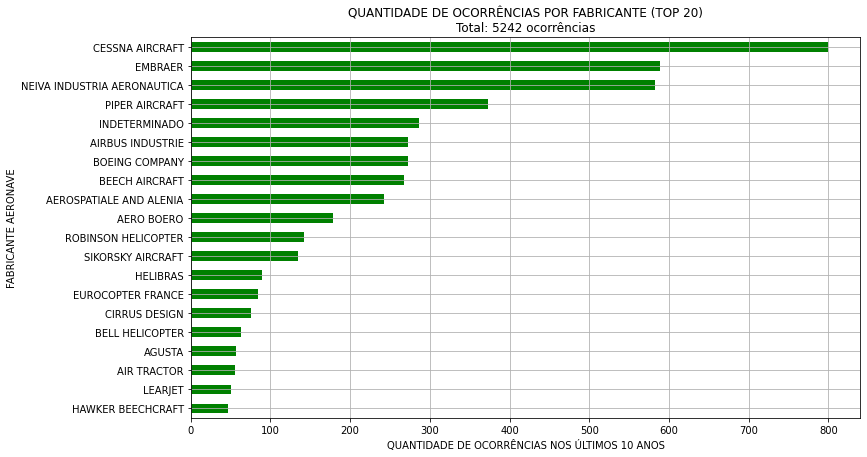

In [129]:
ocorrencias_fabricante = ocorrencias.groupby('FABRICANTE AERONAVE')['CONTAGEM'].sum().sort_values(ascending = False)
ocorrencias_fabricante.head(20).sort_values(ascending = True).plot(kind='barh', figsize=(12,7), color='green', grid=True)

plt.title('QUANTIDADE DE OCORRÊNCIAS POR FABRICANTE (TOP 20)\nTotal: ' + str(ocorrencias['CONTAGEM'].sum()) + ' ocorrências')
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS NOS ÚLTIMOS 10 ANOS')
plt.show()

A fabricante americana Cessna Aircraft, com sede em Kansas nos Estados Unidos e que possui um inventário mais abrangente de aeronaves, produzindo desde monomotores a aviões a jato, é disparada a fabricante com maior número de ocorrências entre 2010 e 2019.

As brasileiras Embraer e Neiva Industria Aeronautica, vem logo na sequencia na segunda e terceira posições respectiviamente do ranking.

A Embraer é uma das maiores empresas aeroespaciais do mundo, responsável por fabricar aviões comerciais e jatos executivos de pequeno, médido e grande porte.

A Neiva Industria Aeronáutica tem estado há 50 anos no mercado produzindo, principalmente, aviões de motores a pistão voltados para agricultura.

Analisando o gráfico acima, podemos entender que tais indicadores seriam uma boa forma de reavaliar o processo de montagem, manutenção e qualidade de peças dessas fabricantes.

Falando em fabricantes, podemos olhar também o país de fabricação.

__Qual país de fabricação está mais presente no número de ocorrências?__ 

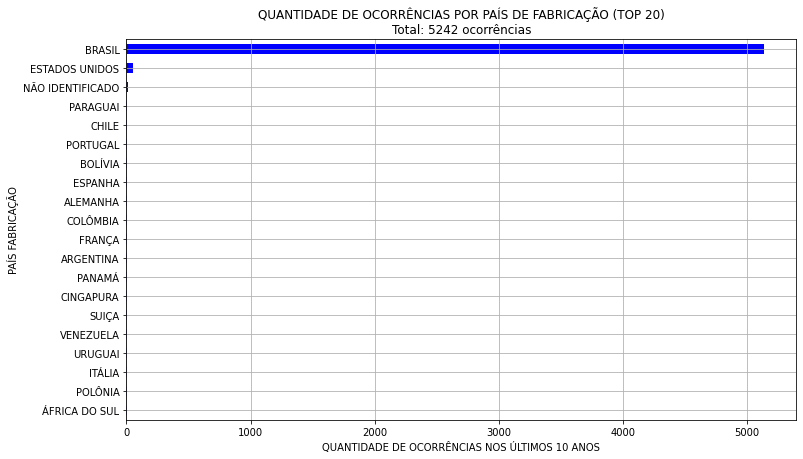

In [130]:
pais_fabricao = ocorrencias.groupby('PAÍS FABRICAÇÃO')['CONTAGEM'].sum().sort_values(ascending = False)
pais_fabricao.head(20).sort_values(ascending = True).plot(kind='barh', figsize=(12,7), color='blue', grid=True)

plt.title('QUANTIDADE DE OCORRÊNCIAS POR PAÍS DE FABRICAÇÃO (TOP 20)\nTotal: ' + str(ocorrencias['CONTAGEM'].sum()) + ' ocorrências')
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS NOS ÚLTIMOS 10 ANOS')
plt.show()

Podemos identicar um dado bem preocupante relacionado as aeronaves fabricadas no Brasil.

Mais de 5100 ocorrências são de aeronaves fabricadas aqui no Brasil.

Um outro questionamento que podemos fazer é:

__Aviões com ano de fabricação mais antigo estão mais presentes no número de ocorrências?__

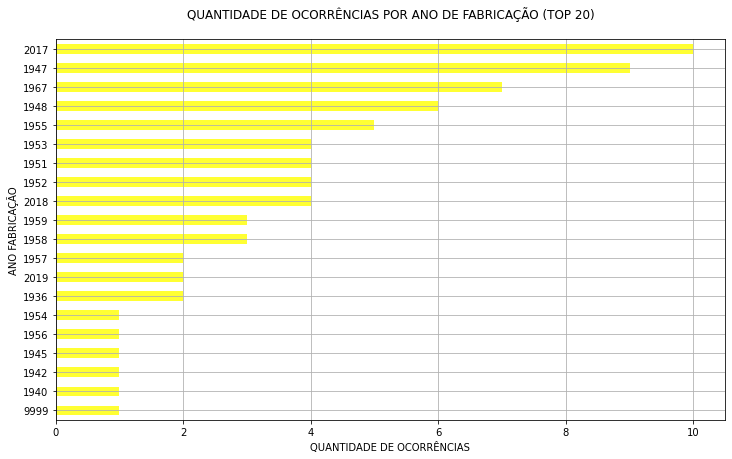

In [131]:
ano_fabricacao = ocorrencias.groupby('ANO FABRICAÇÃO')['CONTAGEM'].sum().sort_values()
ano_fabricacao.head(20).sort_values(ascending = True).plot(kind='barh', figsize=(12,7), color='yellow', alpha=.8, grid = True)


plt.title('QUANTIDADE DE OCORRÊNCIAS POR ANO DE FABRICAÇÃO (TOP 20)\n')
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS')
plt.show()


Analisando os indicadores, observamos que apesar de não terem o maior número de ocorrências, aviões mais antigos estão mais presentes nas ocorrências no período de 2010 a 2019.

Aviões fabricados em 2017, estão no topo da lista com 10 ocorrências, porém aviões fabricados a muitos anos aparecem com maior frequência no TOP 20.

Sendo assim, podemos entender que aviões mais antigos tem uma tendência maior em estar envolvido em algum tipo de ocorrência.

Após entendermos os fabricantes, tipo de moto e ano de fabricação, vamos agora olhar para o momento em que as ocorrências surgiram. 

Com isso, quero saber se é mais propício ocorrer um problema durante o pouso, decolagem ou outro momento da viagem.

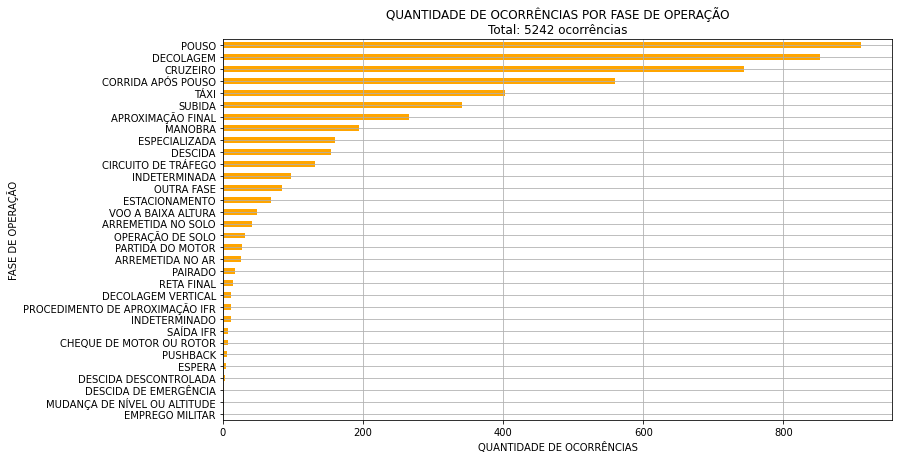

In [132]:
fase_operacao = ocorrencias.groupby('FASE DE OPERAÇÃO')['CONTAGEM'].sum().sort_values().plot(kind='barh', figsize=(12,7), color='orange', grid = True)

plt.title('QUANTIDADE DE OCORRÊNCIAS POR FASE DE OPERAÇÃO\nTotal: ' + str(ocorrencias['CONTAGEM'].sum()) + ' ocorrências')
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS')
plt.show()

De fato, o momento do pouso é um dos mais importantes da viagem. Cerca de 910 ocorrências, das mais de 5200 registradas ocorreram nesta fase. Contudo, vale ressaltar que a decolagem está consideravelmente próxima ao pouso, fazendo dela uma operação delicada também.

O cruzeiro (que é o momento da viagem em si) aparece na terceira posição e assim podemos observar que as maiores ocorrências estão concentradas realmente nas etapas da viagem no geral, desde a decolagem até o pouso.

Como já vimos nos gráficos iniciais, nem toda ocorrência gerada é grave e resulta em fatalidades e danos na aeronave ou destruição da mesma. Uma ocorrência, como o nome já diz, se refere ao fato de que algum evento não previsto ocorreu.

Não obstante, esta é uma pergunta interessante a se responder. Afinal, __quais são os tipos de danos que podem ocorrer a uma aeronave? Qual a frequência?__

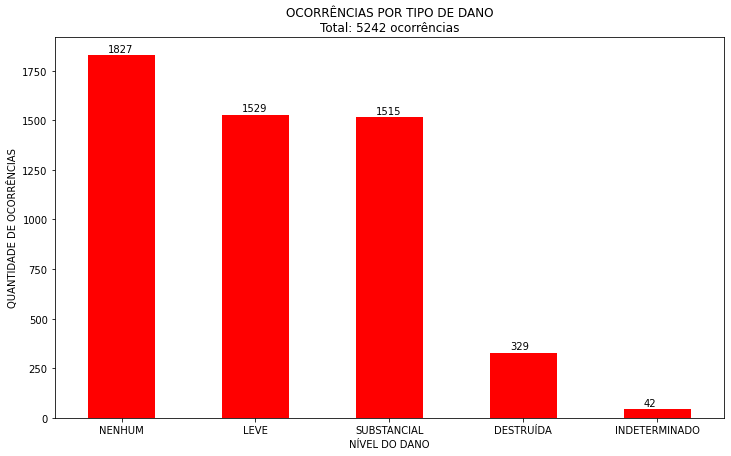

In [133]:
tipo_dano = ocorrencias.groupby('NÍVEL DO DANO')['CONTAGEM'].sum().sort_values(ascending = False).plot(kind='bar', figsize=(12,7), color='red')

for p in tipo_dano.patches:
    b=p.get_bbox()
    tipo_dano.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))

plt.title('OCORRÊNCIAS POR TIPO DE DANO\nTotal: ' + str(ocorrencias['CONTAGEM'].sum()) + ' ocorrências')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xticks(rotation=0)
plt.show()

Pode ver que dentre a mais de 5200 ocorrências, aquelas que não causaram nenhum tipo de dano representam a maior fatia das ocorrências.

Danos leves são aqueles que causam um dano que muitas vezes não vão impactar tanto na operação da aeronave, porém precisam ser corrigidos o quanto antes.

Danos substanciais são aqueles que danificaram significantemente a aeronave. Há casos em que a fuselagem foi danificada, uma asa, turbina, hélice, dentre outros.

Observamos que as ocorrências que causaram a destrição da aeronave vem na quarta colocação e representam cerca de 6% do total das ocorrências. % pode parecer um número baixo, porém sabemos que quando a aeronave fica destruída automaticamente o número de sobreviventes quase sempre é zero.

# Conclusão

Aviões e aeronaves não estão insentas de sofrerem acidentes e problemas. A história tem registros de casos onde centenas de pessoas morreram e milhares de ocorrências foram geradas. Não obstante, vale lembrar que, embora o impacto gerado por uma queda de avião seja grande, sua probabilidade de ocorrer ainda é pequena. 

Mas, vamos levar em consideração outros meios de transporte, como o carro e moto. Apenas no Brasil em 2013, <a href='www.un.org/apps/news/story.asp?NewsID=52300#.ViZ1yNKrSM-'>41 mil pessoas morreram devido a acidentes de trânsito</a>, fazendo do Brasil o <a href='https://nacoesunidas.org/oms-brasil-e-o-pais-com-maior-numero-de-mortes-de-transito-por-habitante-da-america-do-sul/'>país com maior número de mortes no trânsito da América do Sul</a>. Já no mundo, tais acidentes são responsáveis por mais de 1,25 milhão de fatalidades, tendo uma frequência maior em países como China, EUA e Índia. 

Sim, de fato aviões não são indestrutíveis ou absolutamente seguros, mas, mesmo em meio ao cenário atual, é uma das formas mais seguras de viajar.

Além disso, podemos ver indicadores do tipo que ocorrências que não geraram danos na aeronave são as maiores quando falamos em análise por tipo do dano.

Vimos também que aeronaves com motor do tipo pistão são as mais presentes ná analise das ocorrências entre o período de 2010 a 2019.

E podemos ver também que o momento do pouso é geralmente onde há o maior número de ocorrências no período analisado.

# Referências

https://nacoesunidas.org/oms-brasil-e-o-pais-com-maior-numero-de-mortes-de-transito-por-habitante-da-america-do-sul/

http://www.un.org/apps/news/story.asp?NewsID=52300#.ViZ1yNKrSM-

https://embraer.gupy.io/

https://cessna.txtav.com/

https://www.cnnbrasil.com.br/nacional/veja-as-fotos-da-queda-do-aviao-com-a-cantora-marilia-mendonca/
